<a href="https://www.kaggle.com/code/amitranjan74/eda-stock-market?scriptVersionId=158541814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-stock-data/HDFC_Bank.csv
/kaggle/input/indian-stock-data/Reliance.csv
/kaggle/input/indian-stock-data/Infosys.csv
/kaggle/input/indian-stock-data/ICICI_Bank.csv
/kaggle/input/indian-stock-data/Nifty50.csv
/kaggle/input/indian-stock-data/ITC.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
hdfc_bank = pd.read_csv("/kaggle/input/indian-stock-data/HDFC_Bank.csv")
icici_bank = pd.read_csv('/kaggle/input/indian-stock-data/ICICI_Bank.csv')
itc = pd.read_csv('/kaggle/input/indian-stock-data/ITC.csv')
infosys =  pd.read_csv('/kaggle/input/indian-stock-data/Infosys.csv')
nifty50 = pd.read_csv('/kaggle/input/indian-stock-data/Nifty50.csv')
reliance = pd.read_csv('/kaggle/input/indian-stock-data/Reliance.csv')

In [4]:
reliance.head(1)

,Company,date,open,high,low,close,volume
0,Reliance Industr,2015-01-12,386.94,387.16,378.44,382.35,5134307.46


In [5]:
data = pd.DataFrame() #Creating empty dataframe

In [6]:
company = pd.concat([hdfc_bank,icici_bank,itc,infosys,reliance,nifty50])

In [7]:
company.shape

(13368, 7)

In [8]:
company.head()

,Company,date,open,high,low,close,volume
0,HDFC Bank,2015-01-12,484.70,487.20,482.25,483.53,2063185.34
1,HDFC Bank,2015-01-13,484.48,485.98,477.85,481.68,2914144.82
2,HDFC Bank,2015-01-14,480.03,487.33,479.85,481.95,1842616.00
3,HDFC Bank,2015-01-15,495.00,499.10,485.38,496.58,5699180.93
4,HDFC Bank,2015-01-16,501.10,507.45,499.28,500.68,3910614.84


In [9]:
company.Company.value_counts()

Company
HDFC Bank           2228
ICICI Bank          2228
ITC                 2228
Infosys             2228
Reliance Industr    2228
Nifty 50            2228
Name: count, dtype: int64

In [10]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13368 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  13368 non-null  object 
 1   date     13368 non-null  object 
 2   open     13368 non-null  float64
 3   high     13368 non-null  float64
 4   low      13368 non-null  float64
 5   close    13368 non-null  float64
 6   volume   13368 non-null  float64
dtypes: float64(5), object(2)
memory usage: 835.5+ KB


In [11]:
company['date'] = pd.to_datetime(company['date'])

In [12]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13368 entries, 0 to 2227
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Company  13368 non-null  object        
 1   date     13368 non-null  datetime64[ns]
 2   open     13368 non-null  float64       
 3   high     13368 non-null  float64       
 4   low      13368 non-null  float64       
 5   close    13368 non-null  float64       
 6   volume   13368 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 835.5+ KB


There are total 13368 rows and 6 column. all are not null and recently we changed date type from object to datetime for further uses.

In [13]:
company['date'][0]  #all stocks dates are taken from 12thJan 2015

0   2015-01-12
0   2015-01-12
0   2015-01-12
0   2015-01-12
0   2015-01-12
0   2015-01-12
Name: date, dtype: datetime64[ns]

In [14]:
stock_list = company.Company.unique()
stock_list

array(['HDFC Bank', 'ICICI Bank', 'ITC', 'Infosys', 'Reliance Industr',
       'Nifty 50'], dtype=object)

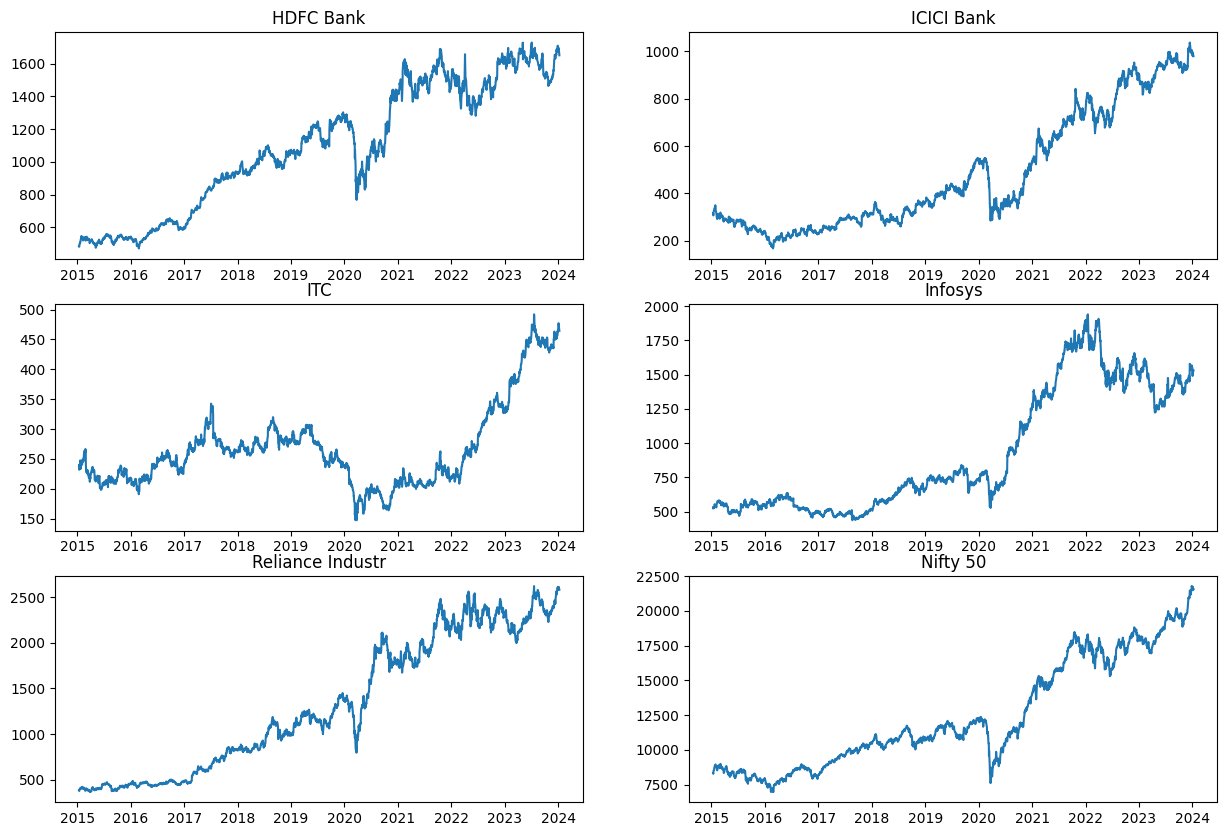

In [15]:
plt.figure(figsize = (15,10))
for i, name in enumerate(stock_list,1):
    plt.subplot(3,2,i)
    data = company[company['Company'] == name]
    plt.plot(data['date'],data['close'])
    plt.title(name)

Analyse closing price of all the stocks

Analysis on total volume of stock traded each day

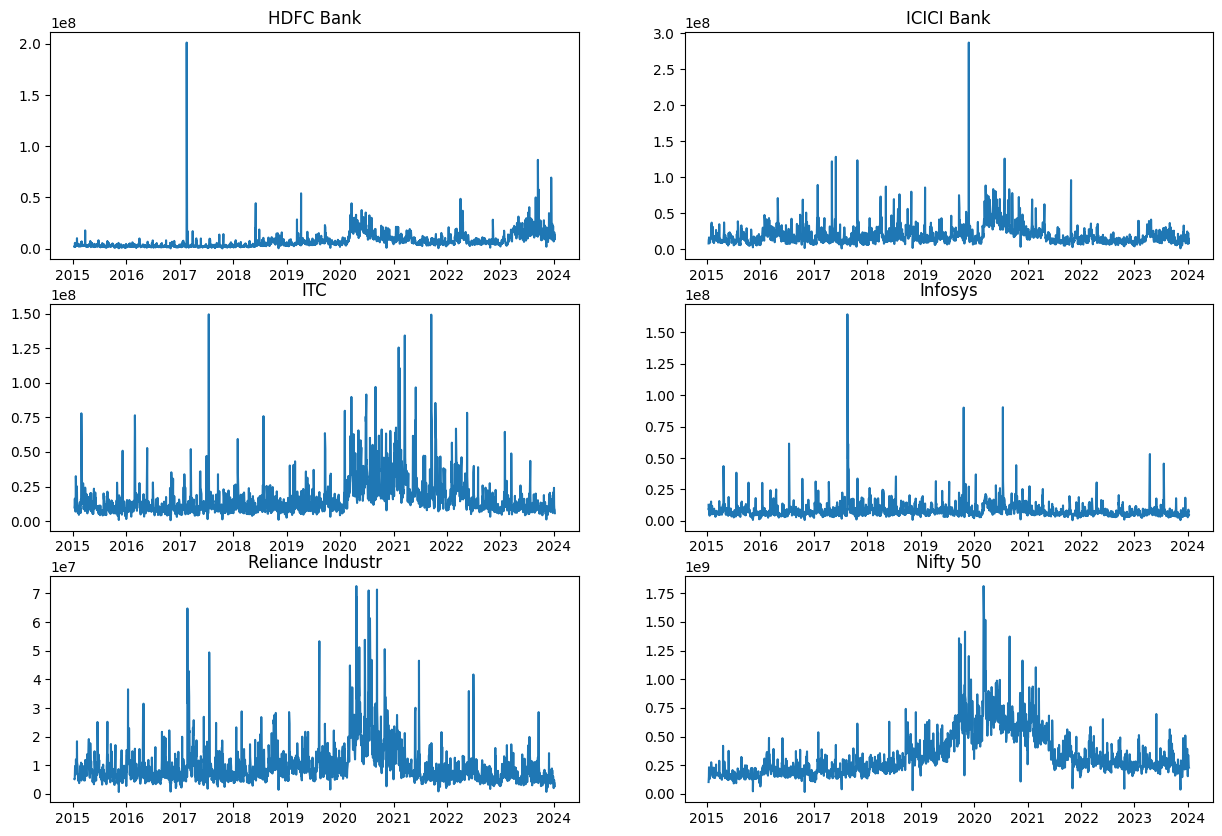

In [16]:
plt.figure(figsize = (15,10))
for i, name in enumerate(stock_list,1):
    plt.subplot(3,2,i)
    data = company[company['Company'] == name]
    plt.plot(data['date'], data['volume'])
    plt.title(name)

Visualizing using plotly

In [17]:
for name in stock_list:
    data = company[company['Company'] == name]
    fig = px.line(data,x = 'date', y = 'volume', title = name, template = 'plotly_dark')
    fig.show()

Making a box plot on trading volume and price

In [18]:
# plt.figure(figsize = (15,10))
# for i, name in enumerate(stock_list,1):
#     plt.subplot(3,2,i)
#     data = company[company['Company'] == name]
#     plt.plot(data['date'], data['volume'])
#     plt.title(name)
 
plt.figure(figsize = (15,10))
for i, name in enumerate(stock_list,1):
    data = company[company['Company'] == name]
    fig = px.box(data,x = 'close', title = name, template = 'plotly_dark')
    fig.show()

<Figure size 1500x1000 with 0 Axes>

Hence. from this graph it can be said that FOLLWING stocks are priced 75% of the time at respective level:

HDFC Bank = 1466 v/s 1656 as on 10th Jan,23
ICICI Bank = 703 v/s 993 as on 10th Jan,23
ITC = 285 v/s 463 as on 10th Jan,23
Infosys = 1389 v/s 1519 as on 10th Jan,23
Reliance = 2110 v/s 2649 as on 10th Jan,23
Nifty 50 = 16279 v/s 21618 as on 10th Jan,23

In [19]:
for name in stock_list:
    data = company[company['Company'] == name]
    fig = px.box(data, x = 'volume', title = name, template = 'plotly_dark')
    fig.show()

Similarly, in term of volume we can say that in past 8 years, the Q3 vol of respective stocks and index is as below:

HDFC Bank : 9M
ICICI Bank: 23M
ITC : 18M
Infosys: 9M
Reliance: 11M
Nifty50: 403M
** 'M' stands for Million.

Analysing Daily Price change in stocks:

In [20]:
company['daily_return'] = round((company['close'] - company['open'])/company['open'] *100 , 2)
company.head(3)

,Company,date,open,high,low,close,volume,daily_return
0,HDFC Bank,2015-01-12,484.70,487.20,482.25,483.53,2063185.34,-0.24
1,HDFC Bank,2015-01-13,484.48,485.98,477.85,481.68,2914144.82,-0.58
2,HDFC Bank,2015-01-14,480.03,487.33,479.85,481.95,1842616.00,0.40


using Matplotlib for visualization

<Axes: >

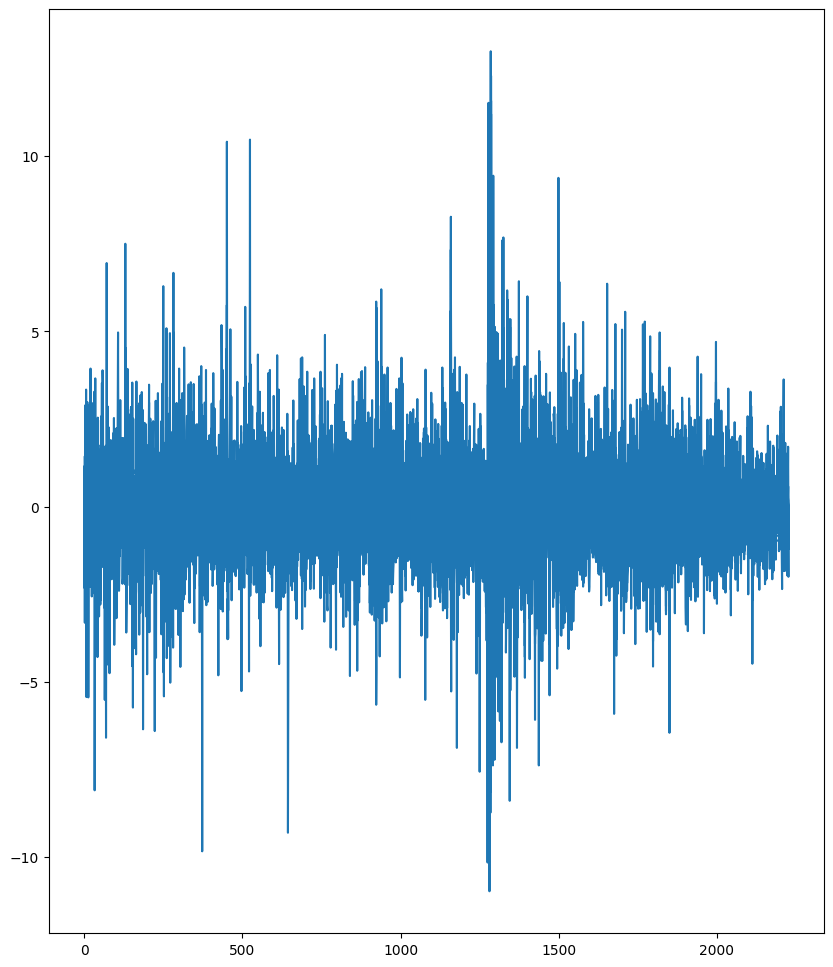

In [21]:
plt.figure(figsize = (10,12))
company['daily_return'].plot()

## using plotly for visualization

In [22]:
# fig = px.line(df,x, y, title, template)
# fig.show()

fig = px.line(company, x= 'date', y ='daily_return', title = 'Daily price change', template = 'plotly_dark')
fig.show()

## We receive maximum daily return in Mar,2020 of approx 12% in a day.

In [23]:
## Analysing daily return on nifty50 only

nifty50 = company[company['Company'] == 'Nifty 50']
# fig = px.line(data, x, y, title, template)
# fig.show()

fig = px.line(nifty50, x = 'date', y = 'daily_return', title = "Nifty Daily Return", template = 'plotly_dark')
fig.show()

(array([19669., 19676., 19683., 19692., 19699., 19706., 19713., 19723.,
        19730.]),
 [Text(19669.0, 0, '2023-11-08'),
  Text(19676.0, 0, '2023-11-15'),
  Text(19683.0, 0, '2023-11-22'),
  Text(19692.0, 0, '2023-12-01'),
  Text(19699.0, 0, '2023-12-08'),
  Text(19706.0, 0, '2023-12-15'),
  Text(19713.0, 0, '2023-12-22'),
  Text(19723.0, 0, '2024-01-01'),
  Text(19730.0, 0, '2024-01-08')])

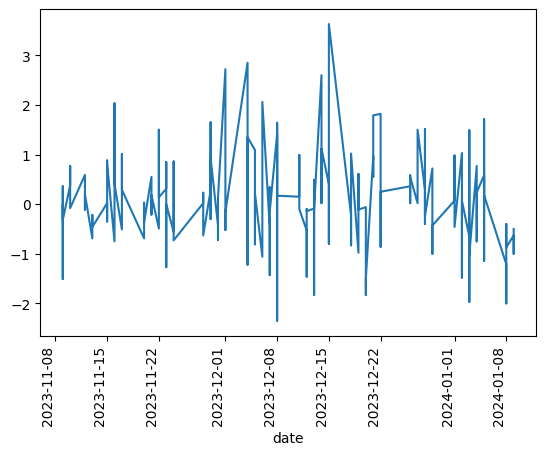

In [24]:
# Nify return in recent 2 months: 2023-11-09 to 2024-01-09

company.set_index('date')['2023-11-09' : '2024-01-09']['daily_return'].plot()
plt.xticks(rotation = 'vertical')

In [25]:
company2 = company.copy()
company2.head(3)

,Company,date,open,high,low,close,volume,daily_return
0,HDFC Bank,2015-01-12,484.70,487.20,482.25,483.53,2063185.34,-0.24
1,HDFC Bank,2015-01-13,484.48,485.98,477.85,481.68,2914144.82,-0.58
2,HDFC Bank,2015-01-14,480.03,487.33,479.85,481.95,1842616.00,0.40


In [26]:
company2.set_index('date', inplace = True)
company2.head(1)

,Company,open,high,low,close,volume,daily_return
date,,,,,,,
2015-01-12,HDFC Bank,484.7,487.2,482.25,483.53,2063185.34,-0.24


## Resampling close column Month wise.


<Axes: xlabel='date'>

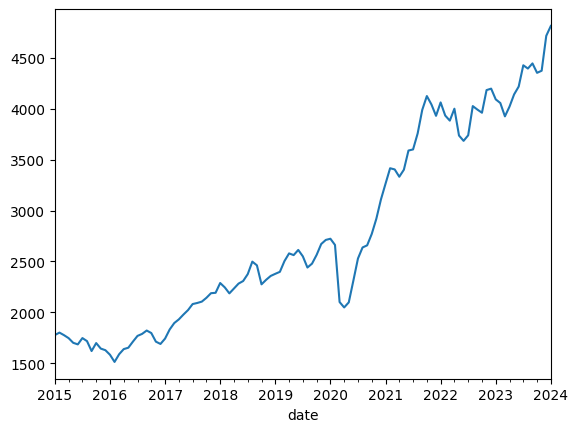

In [27]:
company2['close'].resample('M').mean().plot()

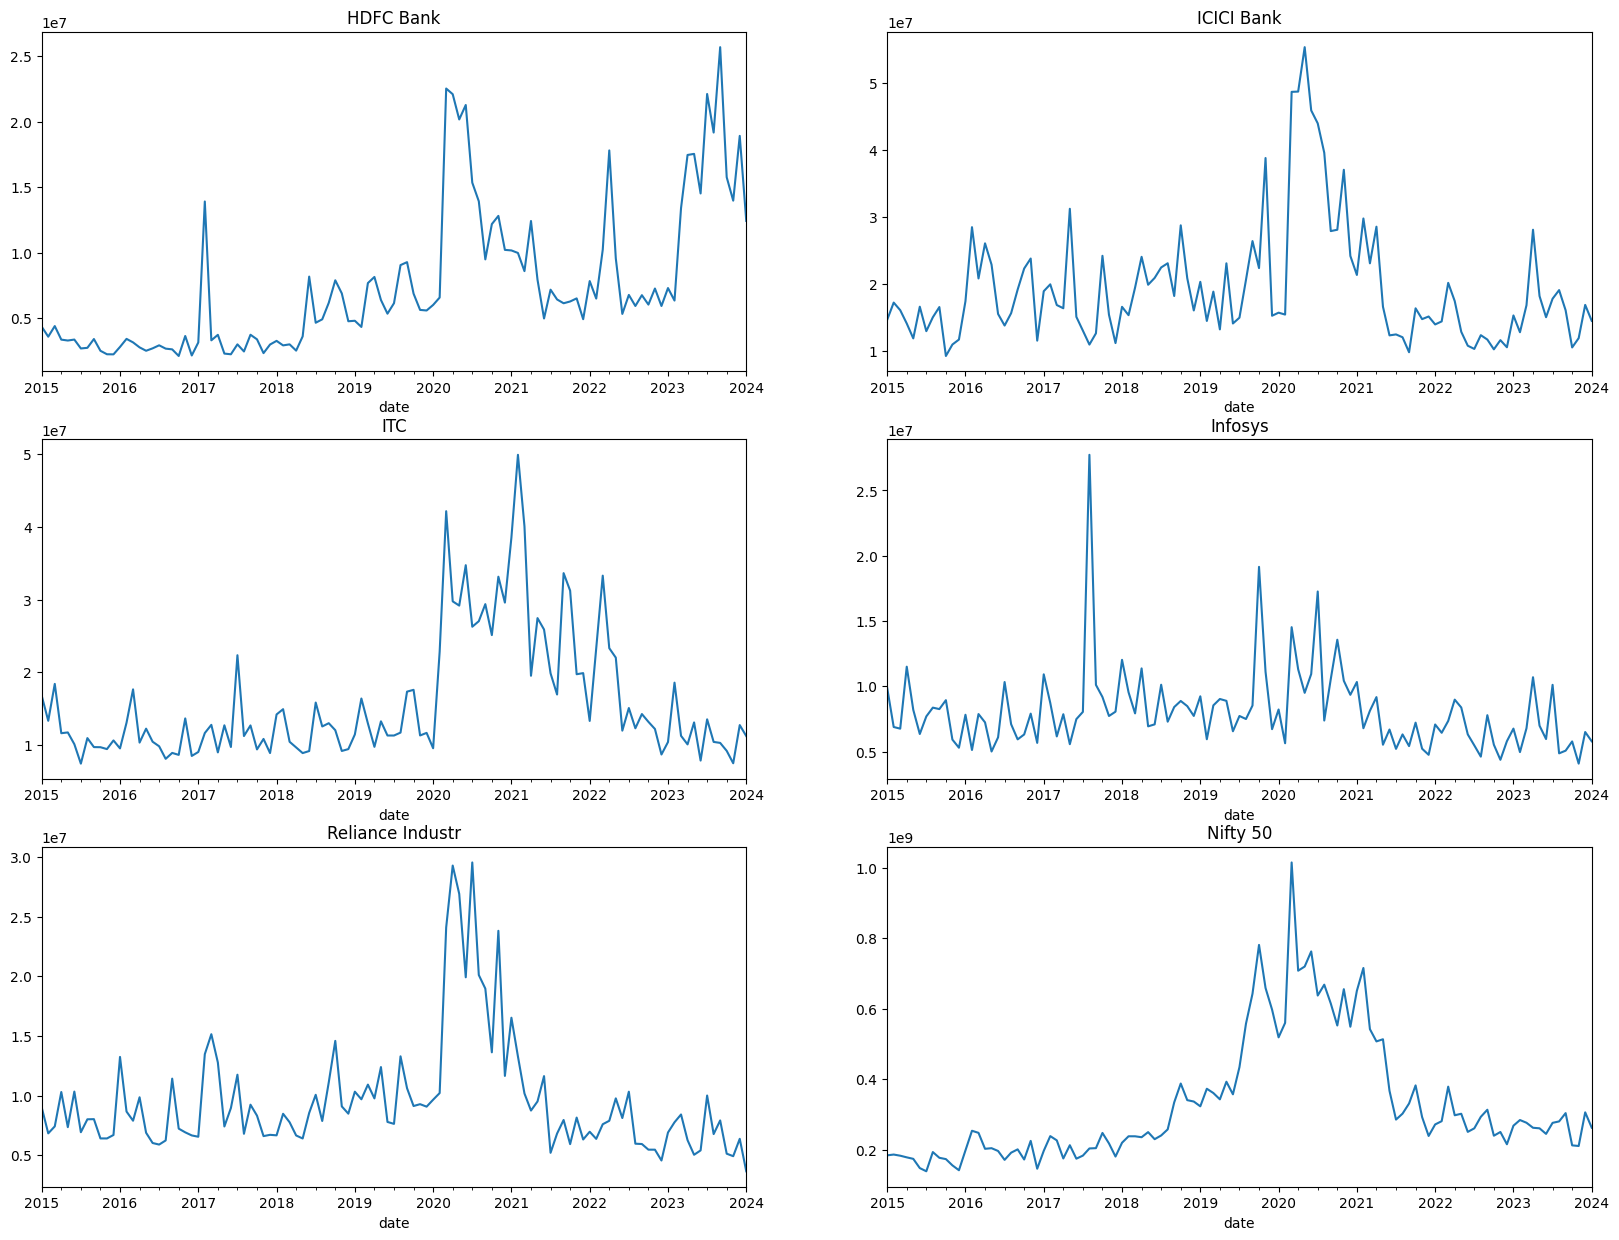

In [28]:
# resampling volumn column monthwise:
plt.figure(figsize = (20,15))
for i, name in enumerate(stock_list,1):
    plt.subplot(3,2,i)
    data = company2[company2['Company'] == name]
    data.volume.resample('M').mean().plot()
    plt.title(name)

Here we can observe a continous increase in volume in HDFC Bank and rest volume have decreased from peak.

# Resampling close column yearwise.

<Axes: xlabel='date'>

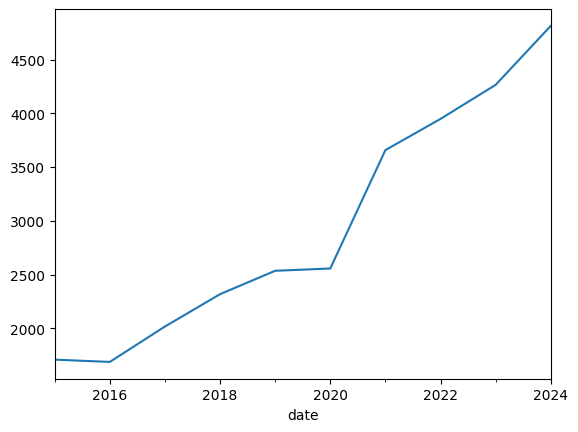

In [29]:
company2.close.resample('Y').mean().plot()

## Checking if stock price of these company are correlated!!

In [30]:
Close = pd.DataFrame()

Close.head()

""


In [31]:
company.Company.value_counts()

Company
HDFC Bank           2228
ICICI Bank          2228
ITC                 2228
Infosys             2228
Reliance Industr    2228
Nifty 50            2228
Name: count, dtype: int64

In [32]:
Close['HDFCBnk'] = company[company['Company'] == 'HDFC Bank'][['close']]
Close['ICICIBnk'] = company[company['Company'] == 'ICICI Bank'][['close']]
Close['ITC'] = company[company['Company'] == 'ITC'][['close']]
Close['Infosys'] = company[company['Company'] == 'Infosys'][['close']]
Close['Reliance Industr'] = company[company['Company'] == 'Reliance Industr'][['close']]
Close['Nifty 50 '] = company[company['Company'] == 'Nifty 50'][['close']]

Close.head(5)


,HDFCBnk,ICICIBnk,ITC,Infosys,Reliance Industr,Nifty 50
0,483.53,315.05,238.57,528.99,382.35,8323.00
1,481.68,309.91,240.07,522.23,379.14,8299.40
2,481.95,306.27,231.87,532.16,375.45,8277.55
3,496.58,320.77,238.60,533.56,388.63,8494.15
4,500.68,321.68,240.07,529.58,391.08,8513.80


# Doing Multivarient  Analysis

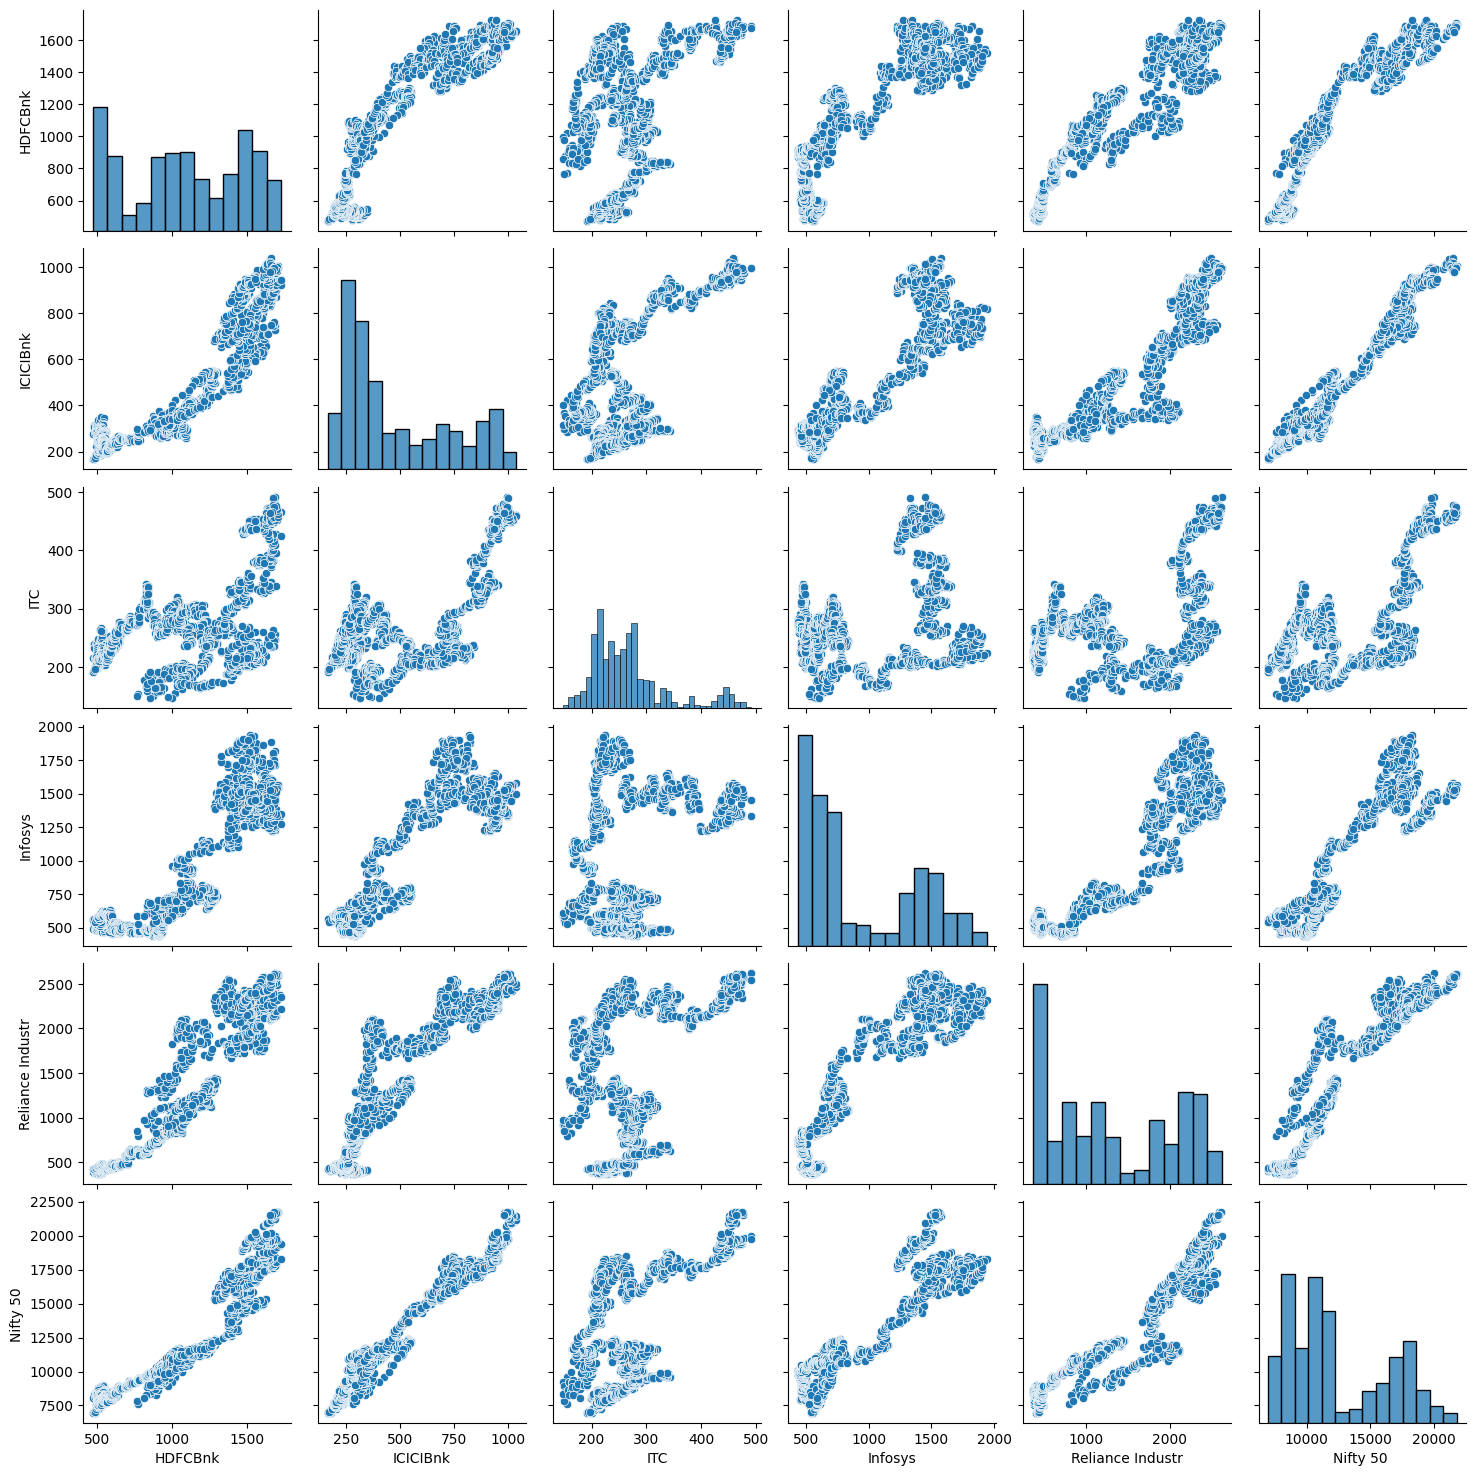

In [33]:
sns.pairplot(data = Close)

# Heatmap Analysis

<Axes: >

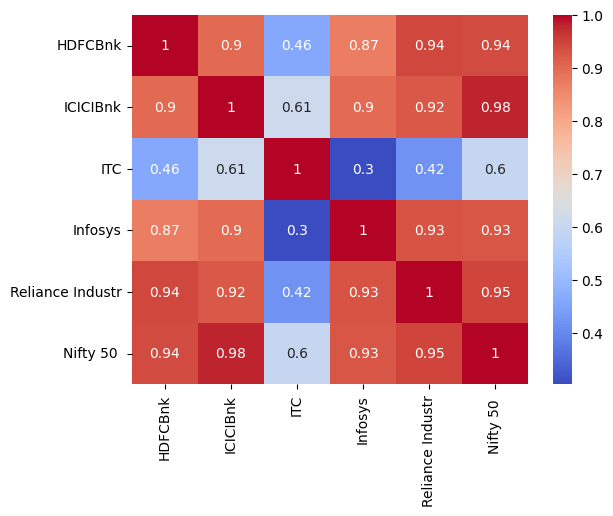

In [34]:
# sns.heatmap(data.corr(), annote, cmap, linecolor)
sns.heatmap(Close.corr(), annot= True, cmap = 'coolwarm', linecolor = 'black')

## We can observe that Nifty 50 is highly correlated with ICICI Bank followed by HDFC Bank and Infosys.

In [35]:
## Checking the correlation on average daily return 

Daily_Return = pd.DataFrame()

Daily_Return['HDFCBnk'] = company[company['Company'] == 'HDFC Bank'][['daily_return']]
Daily_Return['ICICIBnk'] = company[company['Company'] == 'ICICI Bank'][['daily_return']]
Daily_Return['ITC'] = company[company['Company'] == 'ITC'][['daily_return']]
Daily_Return['Infosys'] = company[company['Company'] == 'Infosys'][['daily_return']]
Daily_Return['Reliance Industr'] = company[company['Company'] == 'Reliance Industr'][['daily_return']]
Daily_Return['Nifty 50 '] = company[company['Company'] == 'Nifty 50'][['daily_return']]

Daily_Return.head(2)

,HDFCBnk,ICICIBnk,ITC,Infosys,Reliance Industr,Nifty 50
0,-0.24,1.11,0.11,1.15,-1.19,0.38
1,-0.58,-2.32,0.48,-0.90,-1.15,-0.56


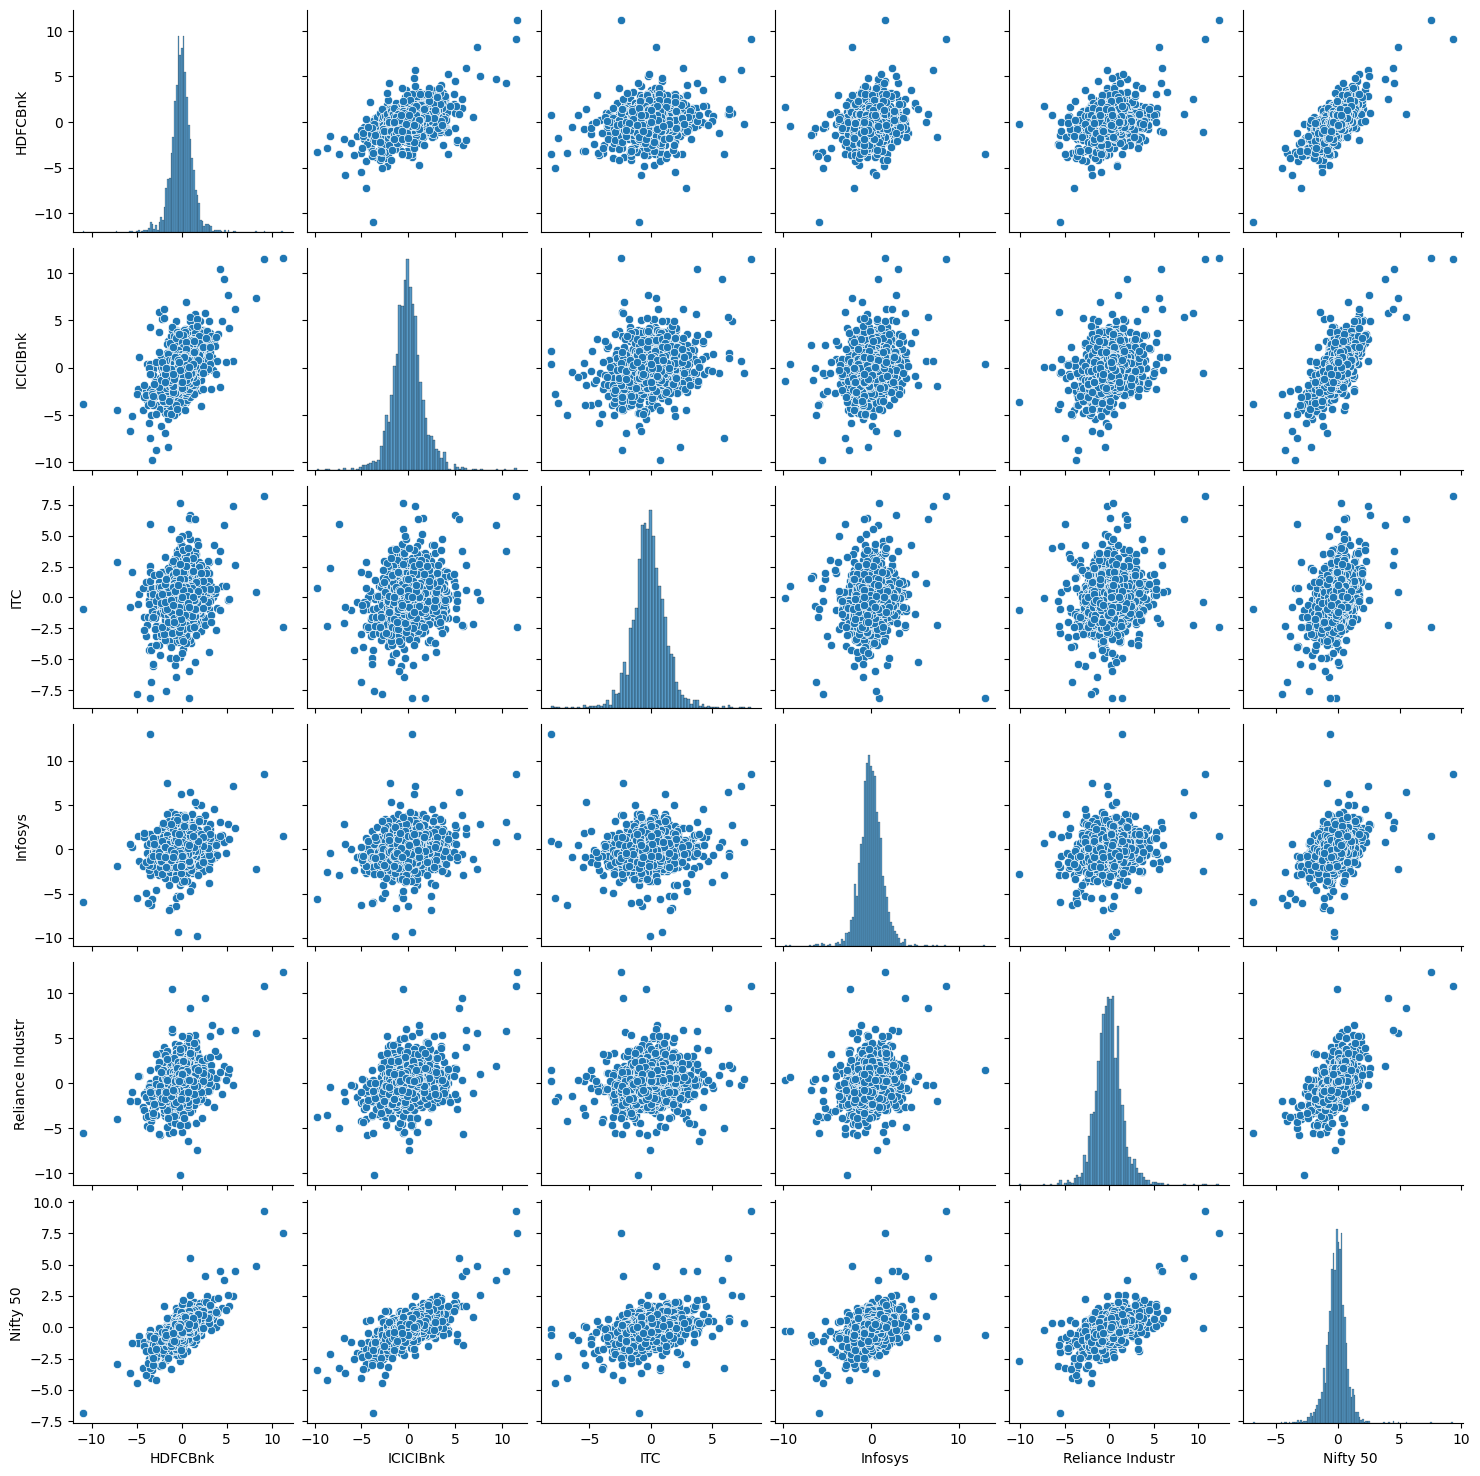

In [36]:
# sns.pairplot(data = )
sns.pairplot(data = Daily_Return)

<Axes: >

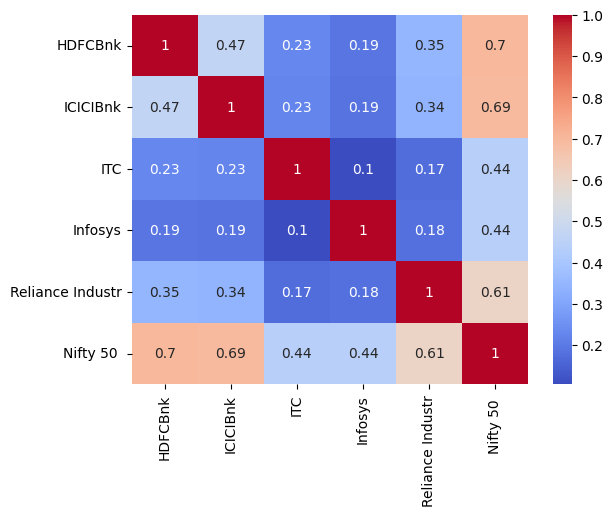

In [37]:
# Heatmap

# sns.heatmap(data.corr(), annot, cmap, linecolor)

sns.heatmap(Daily_Return.corr(), annot = True, cmap = 'coolwarm', linecolor = 'black')

In respect to daily return also we can see that Nify 50 is correlated with ICICI Bank and HDFC Bank followed by Reliance as They are having the highest weightage in Nifty 50 performance. 

## Thank you